Students: Lepidas Nikolas sdi1600090 and Lamprinos Nikos sdi1600088

Course: Datamining

The puprose of this exercise is data exploration on a given crime dataset. The steps that we will go through are data preparation, data research, visualization, clustering. 

The code below will make the cells wider.

In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

First of all we do some imports.

In [2]:
import numpy as np
from seaborn import countplot
from matplotlib.pyplot import figure, show
import pandas as pd

We open crime data file as a dataframe and we use fillna() function to convert all NaN values from column 'SHOOTING' to 'N' (which means "no"). Now 'SHOOTING' column is a categorical variable with unique values {yes,no}. 

In [3]:
crime_data_file = r'./crime.csv'
dataframe = pd.read_csv(crime_data_file, sep=',', encoding="ISO-8859-1", low_memory=False)

#Replace all NaN values on column SHOOTING with 'N'
dataframe['SHOOTING'] = dataframe['SHOOTING'].fillna('N')

Below we use countplot() from seaborn library to count number of crimes per year, month, day of week, district. We added comments because we have already run this code; so all plots are saved. We load these plots inside the cells that follow.

In [4]:
#QUESTION1
"""
#number of crimes per year
figure()
countplot(data=dataframe, x='YEAR').set_title('Number of crimes/year')
show()
#end of number of crimes per year

#number of number of crimes per month
figure()
countplot(data=dataframe, x='MONTH').set_title('Number of crimes/month')
show()
#end of number of crimes per month

#number of number of crimes per day
figure()
countplot(data=dataframe, x='DAY_OF_WEEK').set_title('Number of crimes/day')
show()
#end of number of crimes per day

#number of number of crimes per DISTRICT
figure()
countplot(data=dataframe, x='DISTRICT').set_title('Number of crimes/district')
show()
#end of number of crimes per DISTRICT
"""

"\n#number of crimes per year\nfigure()\ncountplot(data=dataframe, x='YEAR').set_title('Number of crimes/year')\nshow()\n#end of number of crimes per year\n\n#number of number of crimes per month\nfigure()\ncountplot(data=dataframe, x='MONTH').set_title('Number of crimes/month')\nshow()\n#end of number of crimes per month\n\n#number of number of crimes per day\nfigure()\ncountplot(data=dataframe, x='DAY_OF_WEEK').set_title('Number of crimes/day')\nshow()\n#end of number of crimes per day\n\n#number of number of crimes per DISTRICT\nfigure()\ncountplot(data=dataframe, x='DISTRICT').set_title('Number of crimes/district')\nshow()\n#end of number of crimes per DISTRICT\n"

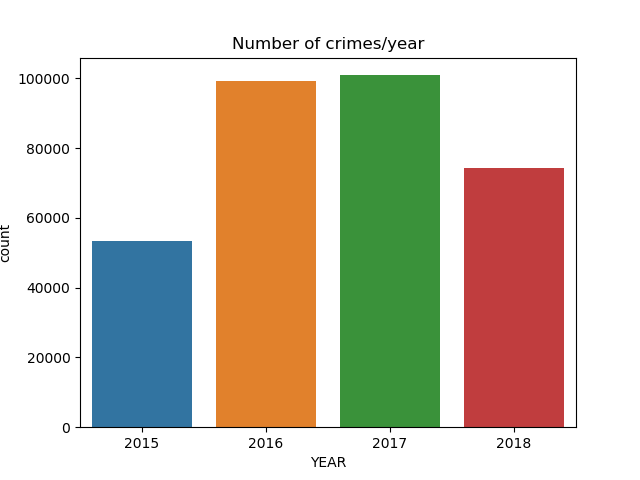

In [5]:
from IPython.display import Image
Image("./Q1_Plots/crimes_per_year.png")

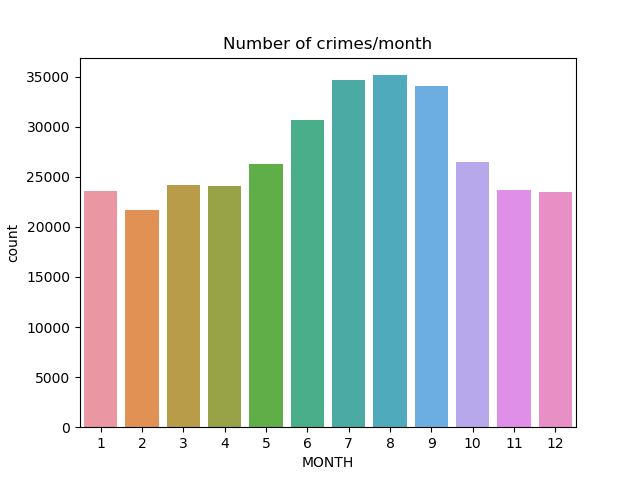

In [6]:
Image("./Q1_Plots/crimes_per_month.png")

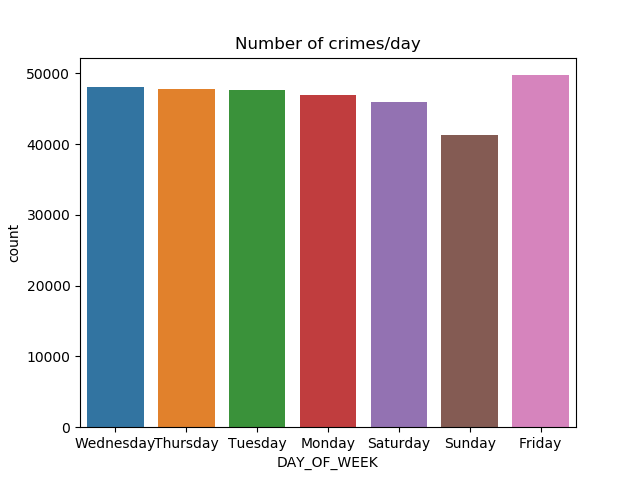

In [7]:
Image("./Q1_Plots/crimes_per_day.png")

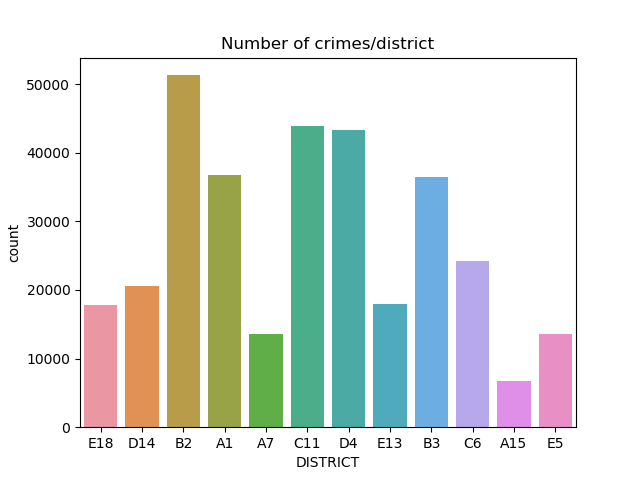

In [8]:
Image("./Q1_Plots/crimes_per_district.png")

Below we use countplot() from seaborn library to count number of crimes per year, district in which shooting happened. We added comments because we have already run this code; so all plots are saved. We load these plots inside the cells that follow.

In [9]:
#QUESTION2
"""
#create a dataframe shooting_crimes with only crimes that has SHOOTING column equal to Y (YES)
shooting_crimes = dataframe.loc[dataframe['SHOOTING'] == 'Y']

#number of crimes/year with shooting
figure()
countplot(data=shooting_crimes, x='YEAR').set_title('Number of crimes/year with shooting')
show()
#end of number of crimes/year with shooting

#number of crimes/district with shooting
figure()
countplot(data=shooting_crimes, x='DISTRICT').set_title('Number of crimes/district with shooting')
show()
#end of number of crimes/district with shooting
"""

"\n#create a dataframe shooting_crimes with only crimes that has SHOOTING column equal to Y (YES)\nshooting_crimes = dataframe.loc[dataframe['SHOOTING'] == 'Y']\n\n#number of crimes/year with shooting\nfigure()\ncountplot(data=shooting_crimes, x='YEAR').set_title('Number of crimes/year with shooting')\nshow()\n#end of number of crimes/year with shooting\n\n#number of crimes/district with shooting\nfigure()\ncountplot(data=shooting_crimes, x='DISTRICT').set_title('Number of crimes/district with shooting')\nshow()\n#end of number of crimes/district with shooting\n"

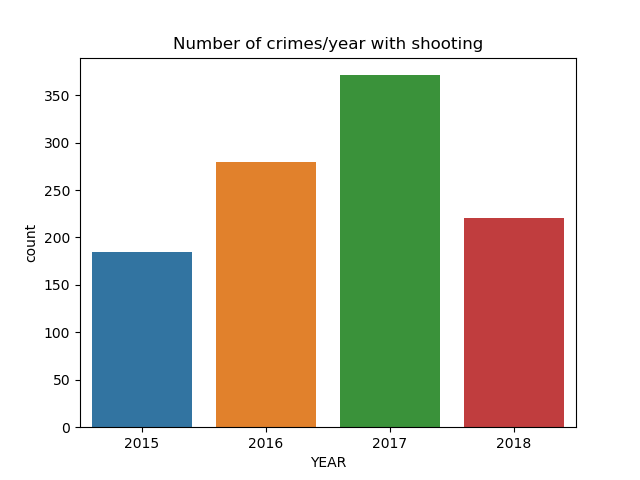

In [10]:
Image("./Q2_Plots/shooting_crimes_per_year.png")

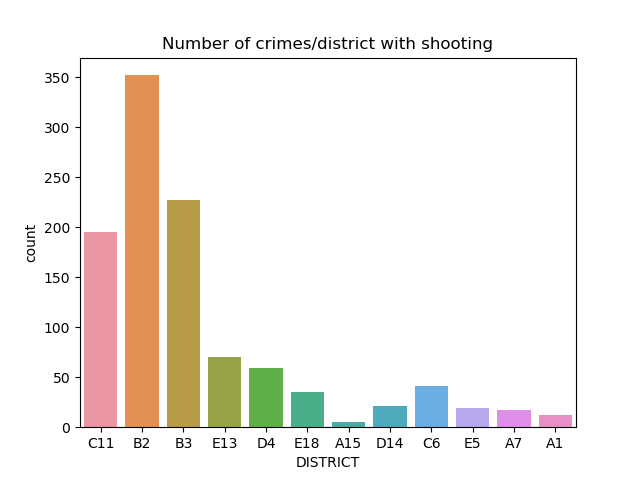

In [11]:
Image("./Q2_Plots/shooting_crimes_per_district.png")

Below we add a new column to our dataframe as a categorical variable with values {Day, Night}. To do this we use column 'HOUR'. If hour is between 18:00-06:00 we give value 'Night', else we give the value 'Day'. We added comments because we have already run this code; so the plot is saved. We load this plot inside the cell that follow.

In [12]:
#QUESTION3

#just print a list
def printList(List):
    for i in range(15):
        print(List[i])
    print()

#add a new column to our dataframe as a categorical variable with values {Day,Night}
new_column = []
for x in range(len(dataframe.index)):
    #Hour between 18:00-06:00 -> Night and between 06:01-17:59 -> Day
    if ((dataframe["HOUR"][x] >= 18 and dataframe["HOUR"][x] <=23) or (dataframe["HOUR"][x] >= 0 and dataframe["HOUR"][x] <= 6)):
        new_column.append("Night")
    else:
        new_column.append("Day")

#insert this new column next to the until now last column
dataframe.insert(17,"Day or Night",new_column,True)
"""
#number of crimes at day or night
figure()
countplot(data=dataframe, x='Day or Night').set_title('Number of crimes at day or night')
show()
#end of number of crimes at day or night
"""

"\n#number of crimes at day or night\nfigure()\ncountplot(data=dataframe, x='Day or Night').set_title('Number of crimes at day or night')\nshow()\n#end of number of crimes at day or night\n"

As we can see most of the crimes happened between day hours.

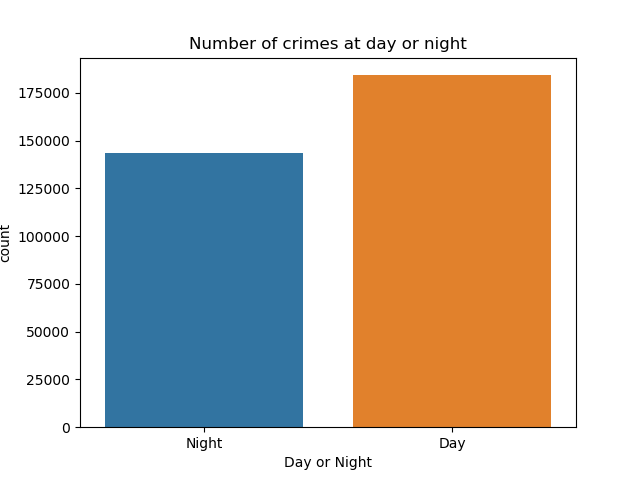

In [13]:
Image("./Q3_Plots/crimes_day_night.png")

In the code below we create two dataframes; one only with crimes that happened on day hours and another one only with crimes that happened on night hours. Finally, we give results for the most common crime groups at day and night.

In [14]:
#QUESTION4

#create a dataframe crimes_day only with crimes that happened between 06:01-17:59
crimes_day = dataframe.loc[dataframe['Day or Night'] == 'Day']
crimes_day = crimes_day[["OFFENSE_CODE_GROUP", "Day or Night"]]
result = crimes_day.groupby("OFFENSE_CODE_GROUP").count()
print("Day:\n")
print(result["Day or Night"].nlargest(5))

print("\n")

#create a dataframe crimes_night only with crimes that happened between 18:00-06:00
crimes_night = dataframe.loc[dataframe['Day or Night'] == 'Night']
crimes_night = crimes_night[["OFFENSE_CODE_GROUP", "Day or Night"]]
result = crimes_night.groupby("OFFENSE_CODE_GROUP").count()
print("Night:\n")
print(result["Day or Night"].nlargest(5))


Day:

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    21852
Larceny                            17240
Medical Assistance                 13332
Other                              11245
Investigate Person                 10937
Name: Day or Night, dtype: int64


Night:

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    16282
Medical Assistance                 10894
Larceny                             9430
Vandalism                           8406
Simple Assault                      8269
Name: Day or Night, dtype: int64


Below we do a plot before we do the clustering. We added comments because we have already run this code; so the plot is saved. We load this plot inside the cell that follows.

In [15]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

"""
location = dataframe[["Lat","Long"]]
location = location.dropna()
location = location.loc[(location["Lat"] > 40) & (location["Long"] < -60)]
x = location["Long"]
y = location["Lat"]

colors = np.random.rand(len(location))

plt.figure(figsize=(20,20))
plt.scatter(x,y,c=colors, alpha=0.5)
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()
"""

'\nlocation = dataframe[["Lat","Long"]]\nlocation = location.dropna()\nlocation = location.loc[(location["Lat"] > 40) & (location["Long"] < -60)]\nx = location["Long"]\ny = location["Lat"]\n\ncolors = np.random.rand(len(location))\n\nplt.figure(figsize=(20,20))\nplt.scatter(x,y,c=colors, alpha=0.5)\nplt.xlabel("Long")\nplt.ylabel("Lat")\nplt.show()\n'

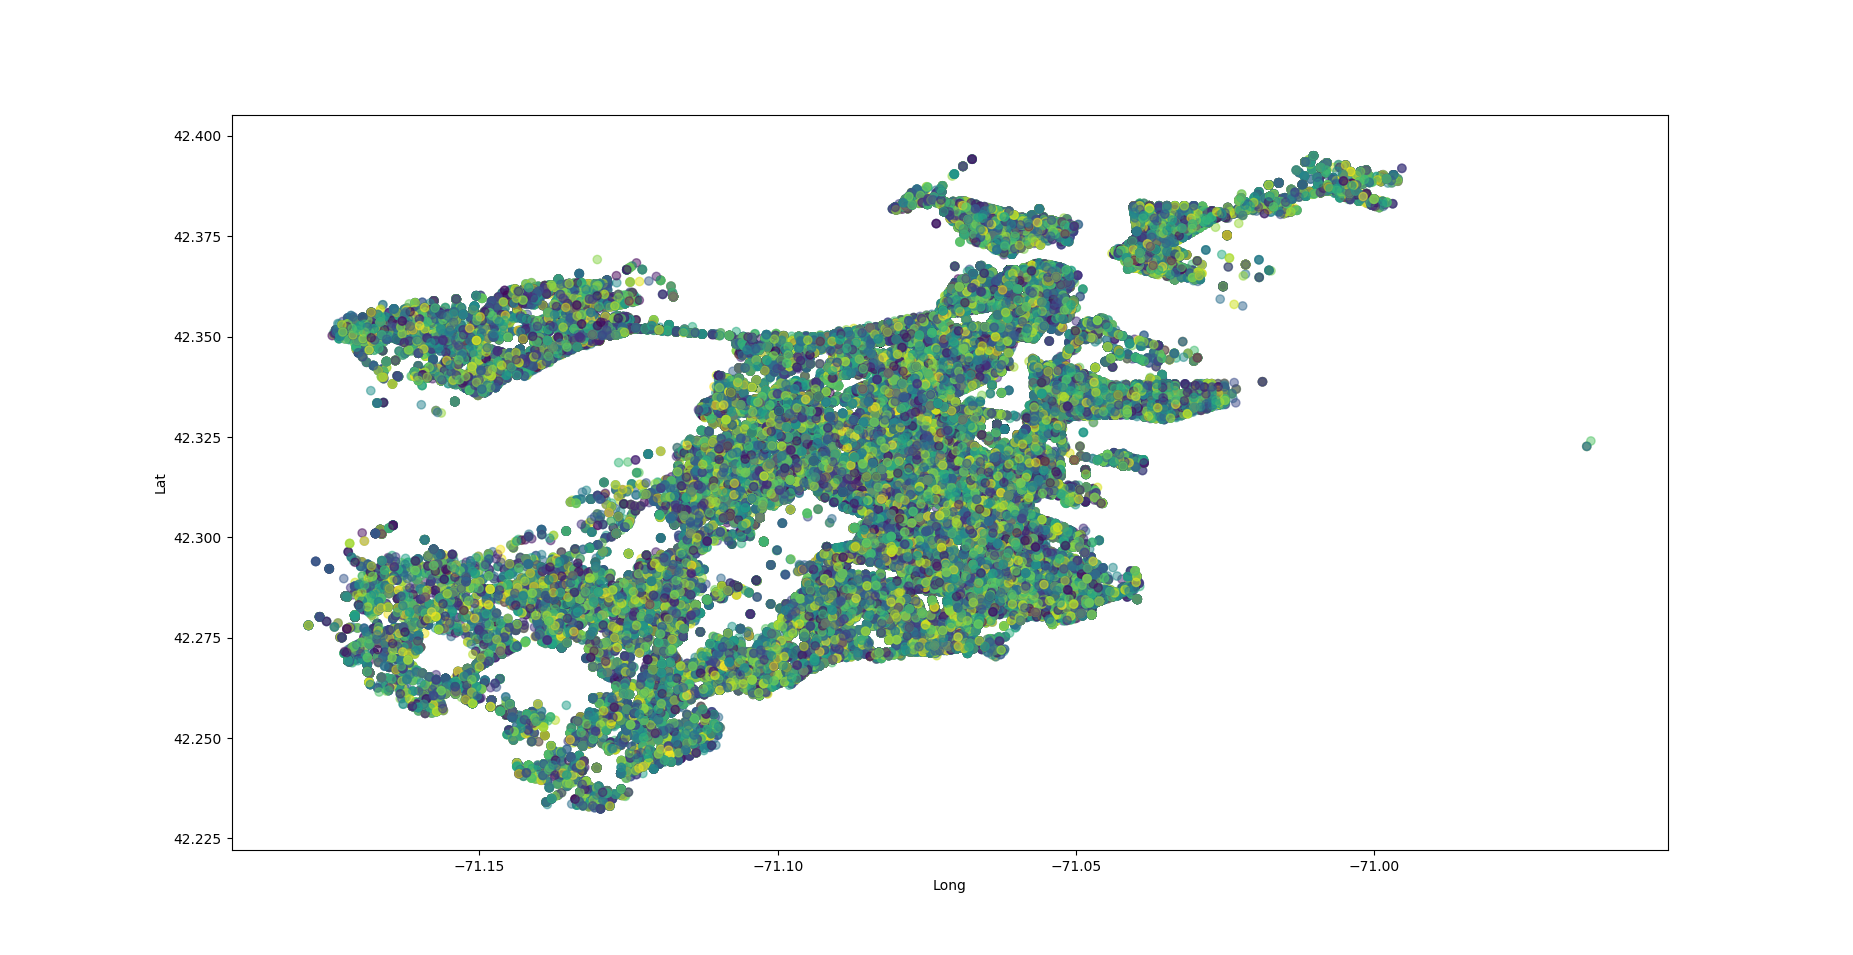

In [16]:
Image("./Q5_Plots/Figure_1.png")

In the code below we do the clustering method with KMeans on 1) location 2) location and offense code 3) location and month. Each one for n_clusters={2,3,5,10}. Plots' code is in comment for the same reason as before. We use red color for clusters' centers.

In [17]:
#QUESTION5
"""
#Dataframe for clustering on location
location = dataframe[["Lat","Long"]]

#Dataframe for clustering on location and offense_code
location = dataframe[["Lat","Long","OFFENSE_CODE"]]

#Dataframe for clustering on location and month
location = dataframe[["Lat","Long","MONTH"]]

#Drop NaN values
location = location.dropna()

#Add some restrictions
location = location.loc[(location["Lat"] > 40) & (location["Long"] < -60)]

#Convert dataframe to numpy array
X = location.values

#Clustering with KMeans
km = KMeans(n_clusters=2)
km.fit(X)
y_km = km.predict(X)
labels = km.labels_
centers = km.cluster_centers_

#Plot for clustering on location

plt.figure(figsize=(40,40))
plt.scatter(X[:,1], X[:,0], c=y_km, s=50, cmap="viridis")
plt.scatter(centers[:,1], centers[:,0], c="red", s=50, alpha=0.5)
plt.title("KMeans n_clusters = 2 in location")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.show()


from mpl_toolkits.mplot3d import Axes3D

#Plot for clustering on location and offense_code
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:,1], X[:,0], X[:,2], c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Long")
ax.set_ylabel("Lat")
ax.set_zlabel("Month")
plt.title("KMeans n_clusters = 2 in location and offense_code")
plt.show()

#Plot for clustering on location and month
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:,1], X[:,0], X[:,2], c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Long")
ax.set_ylabel("Lat")
ax.set_zlabel("Month")
plt.title("KMeans n_clusters = 2 in location and month")
plt.show()
"""

'\n#Dataframe for clustering on location\nlocation = dataframe[["Lat","Long"]]\n\n#Dataframe for clustering on location and offense_code\nlocation = dataframe[["Lat","Long","OFFENSE_CODE"]]\n\n#Dataframe for clustering on location and month\nlocation = dataframe[["Lat","Long","MONTH"]]\n\n#Drop NaN values\nlocation = location.dropna()\n\n#Add some restrictions\nlocation = location.loc[(location["Lat"] > 40) & (location["Long"] < -60)]\n\n#Convert dataframe to numpy array\nX = location.values\n\n#Clustering with KMeans\nkm = KMeans(n_clusters=2)\nkm.fit(X)\ny_km = km.predict(X)\nlabels = km.labels_\ncenters = km.cluster_centers_\n\n#Plot for clustering on location\n\nplt.figure(figsize=(40,40))\nplt.scatter(X[:,1], X[:,0], c=y_km, s=50, cmap="viridis")\nplt.scatter(centers[:,1], centers[:,0], c="red", s=50, alpha=0.5)\nplt.title("KMeans n_clusters = 2 in location")\nplt.ylabel("Lat")\nplt.xlabel("Long")\nplt.show()\n\n\nfrom mpl_toolkits.mplot3d import Axes3D\n\n#Plot for clustering on 

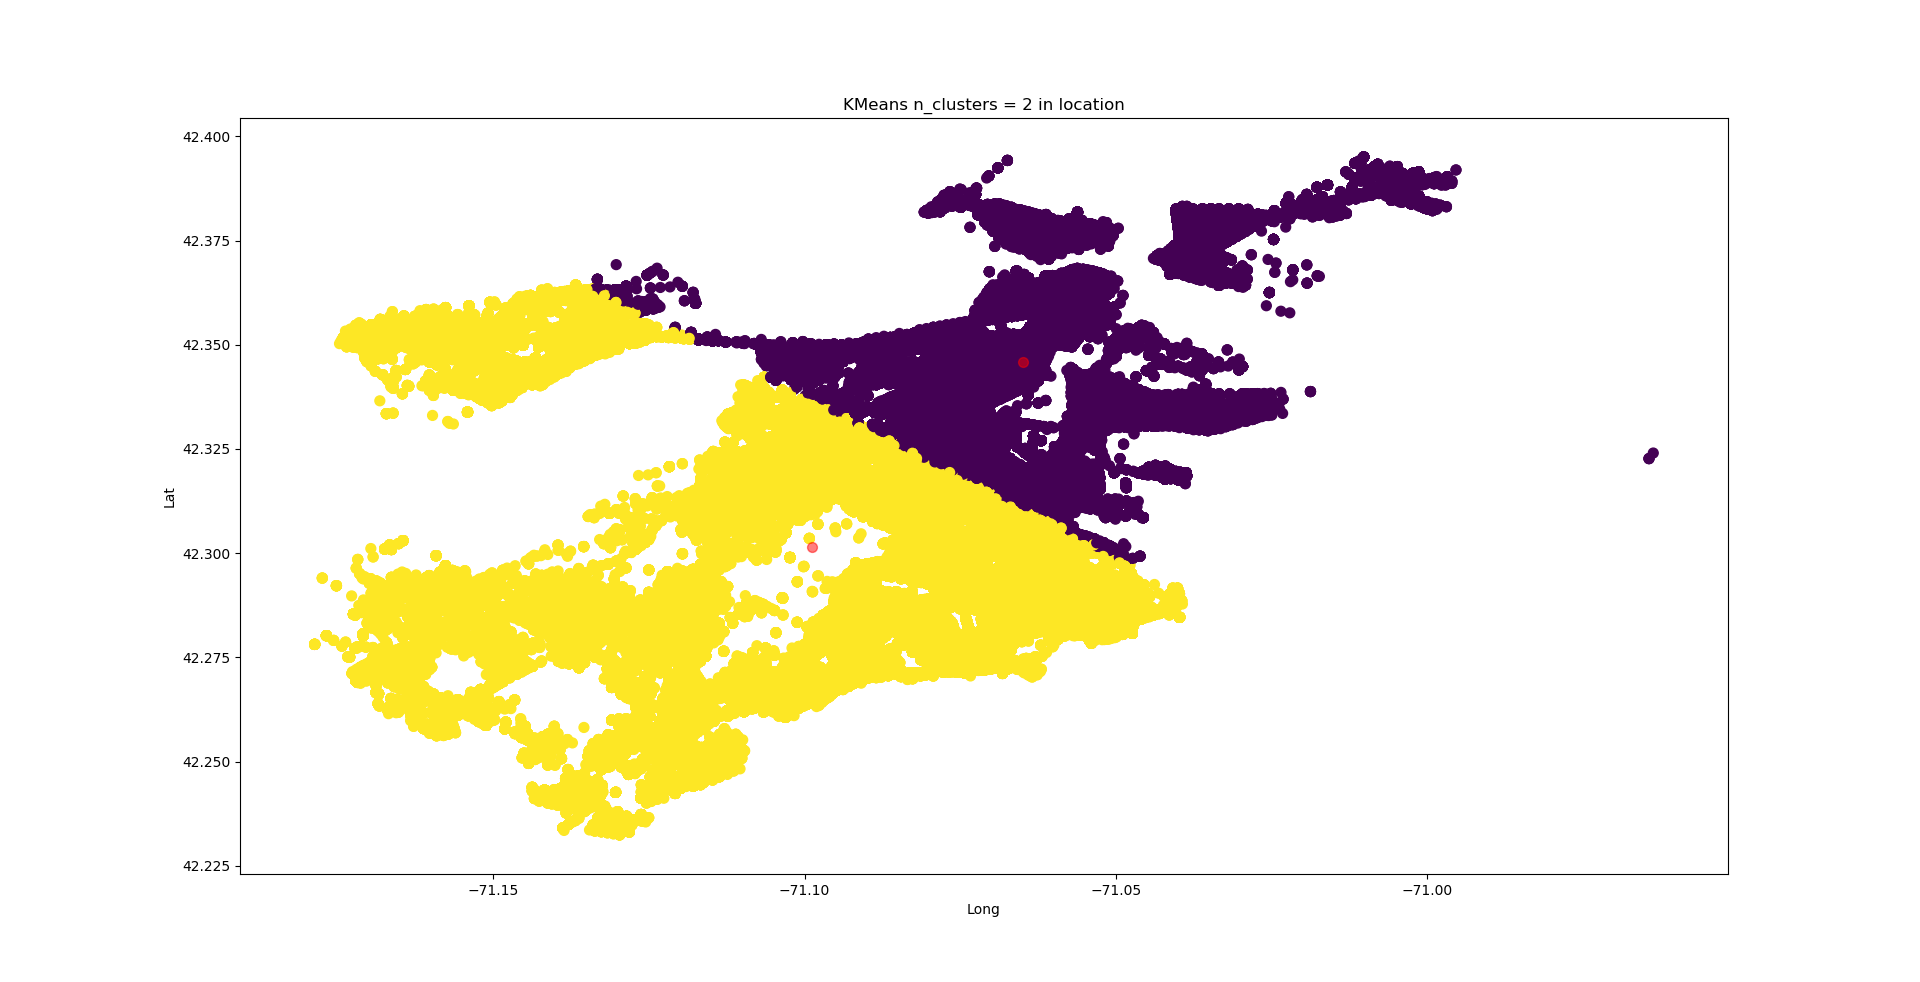

In [18]:
Image("./Q5_Plots/location-2clusters.png")

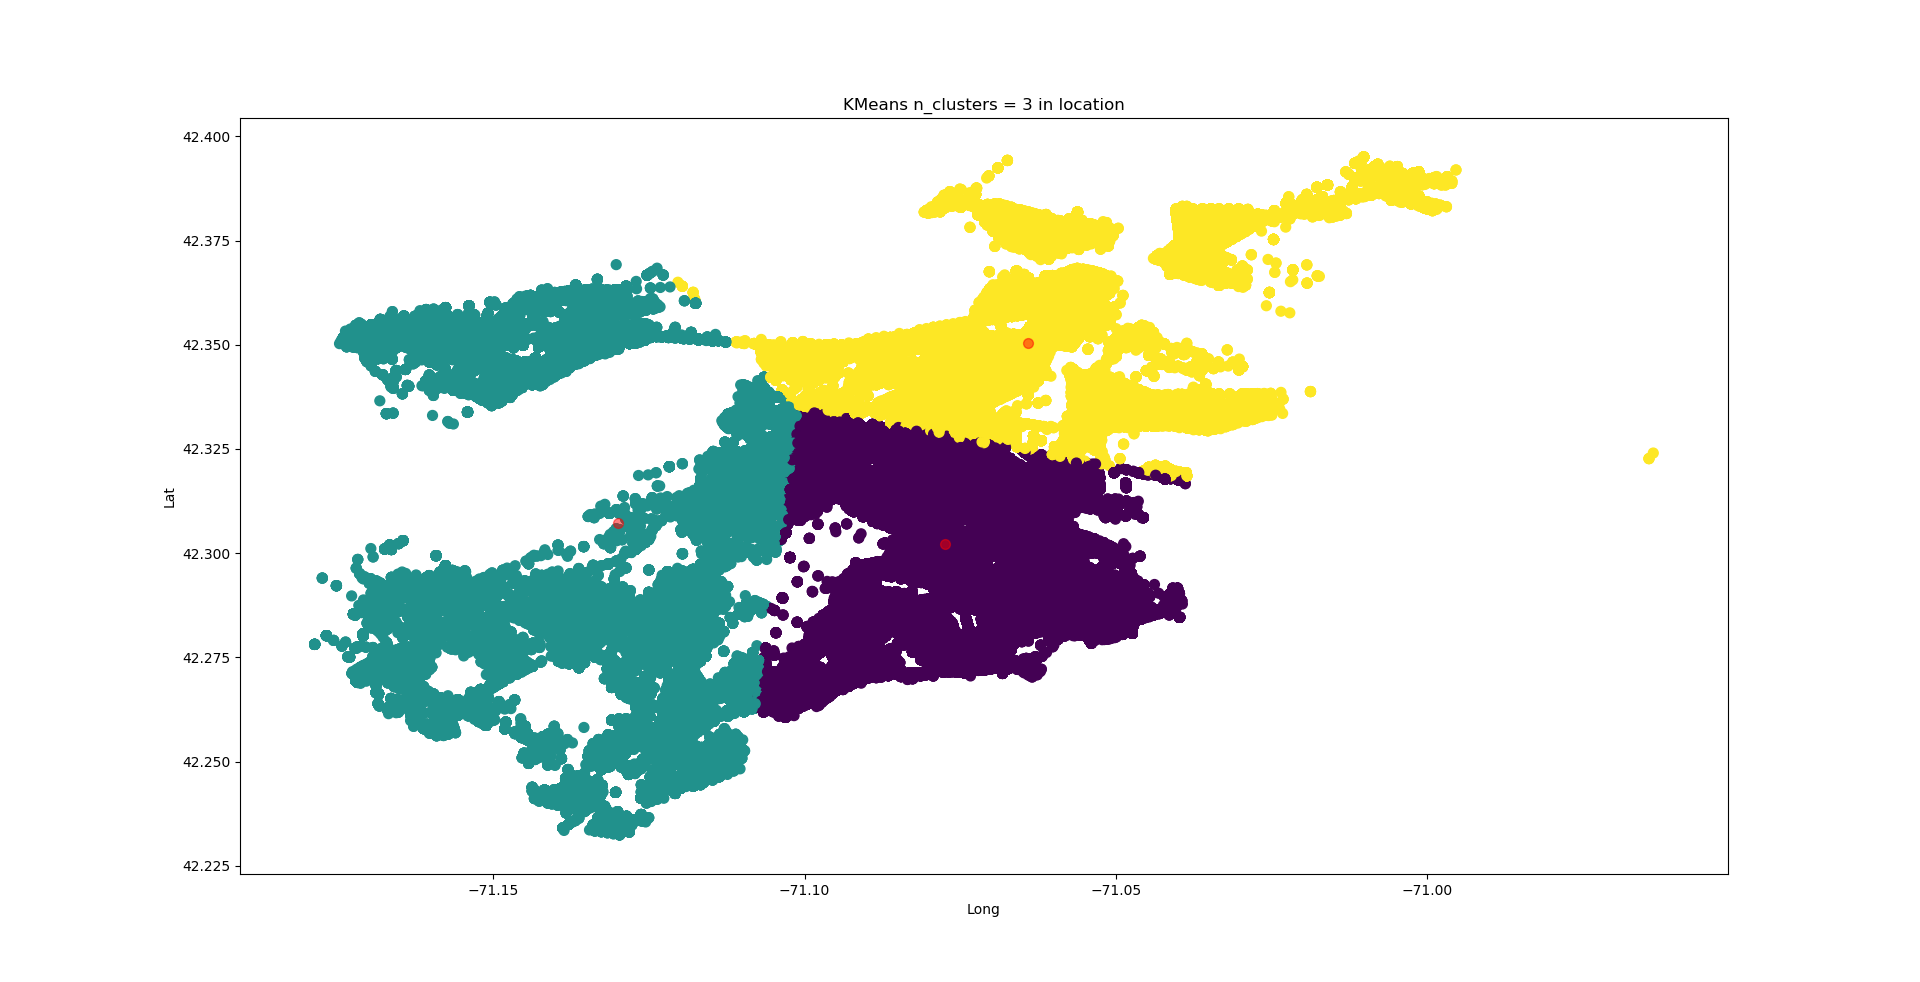

In [19]:
Image("./Q5_Plots/location-3clusters.png")

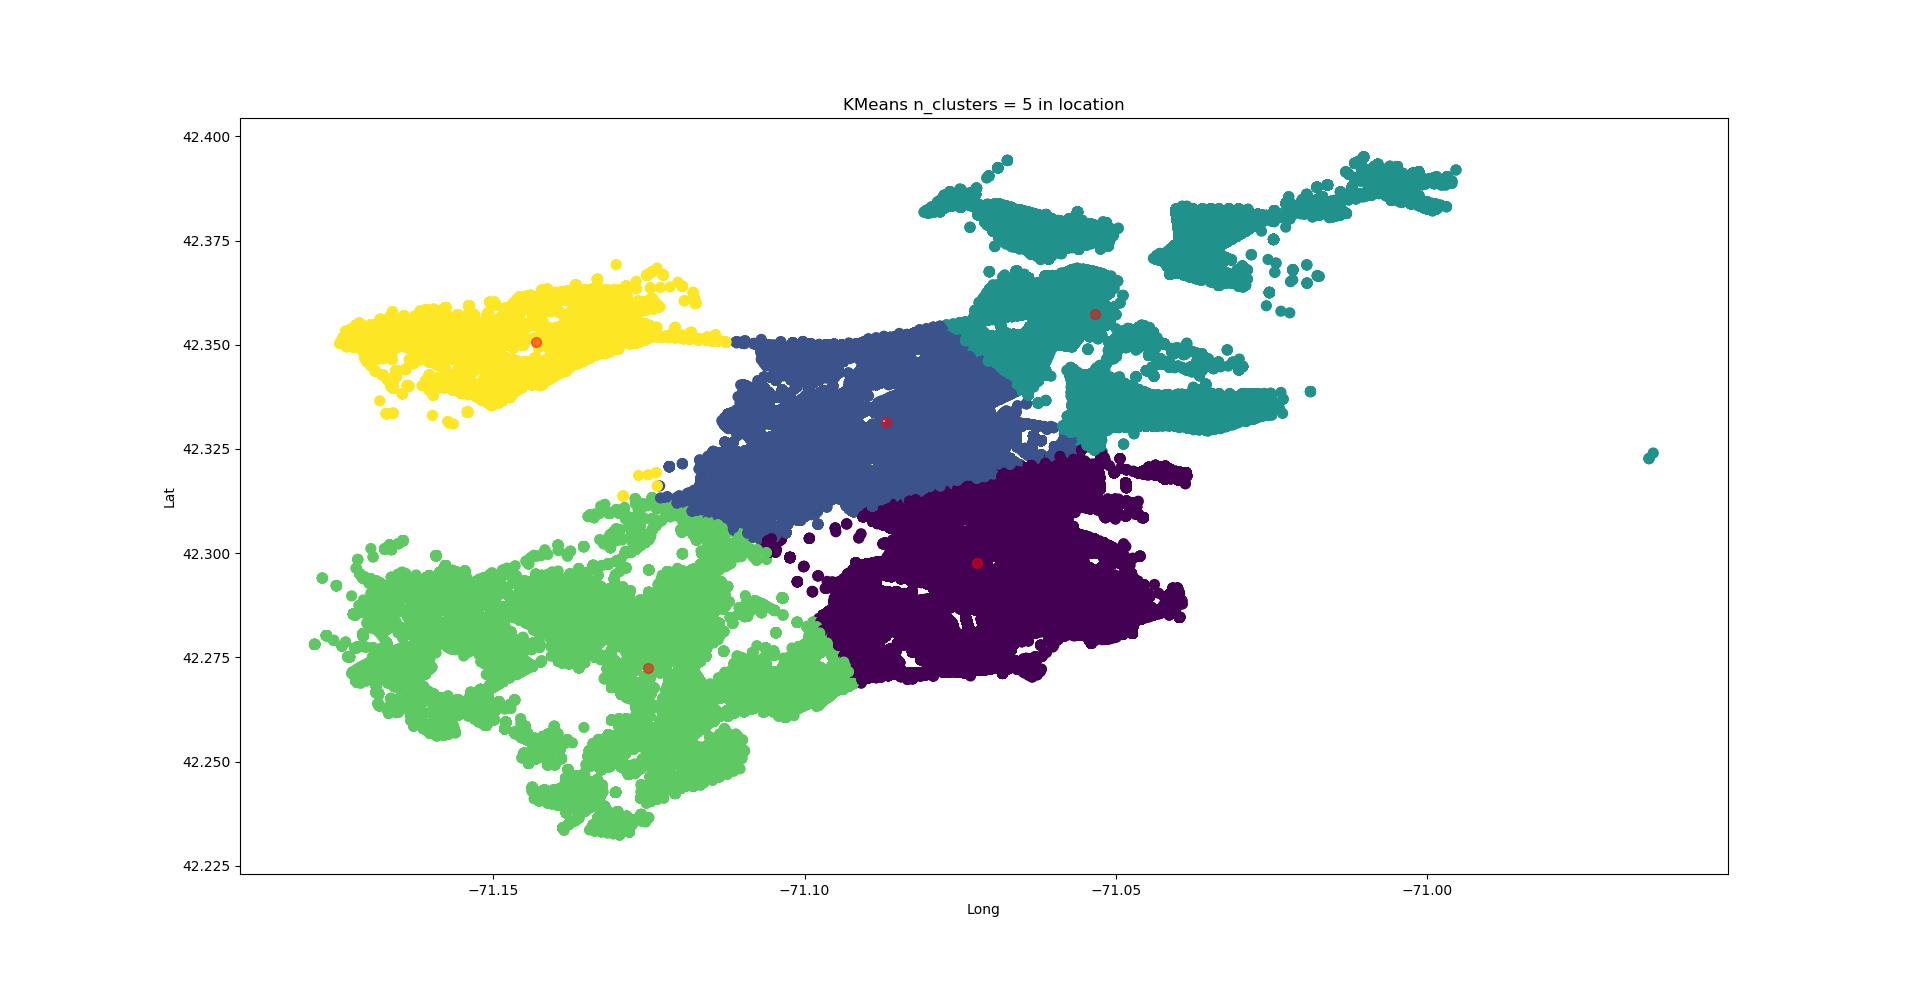

In [20]:
Image("./Q5_Plots/location-5clusters.png")

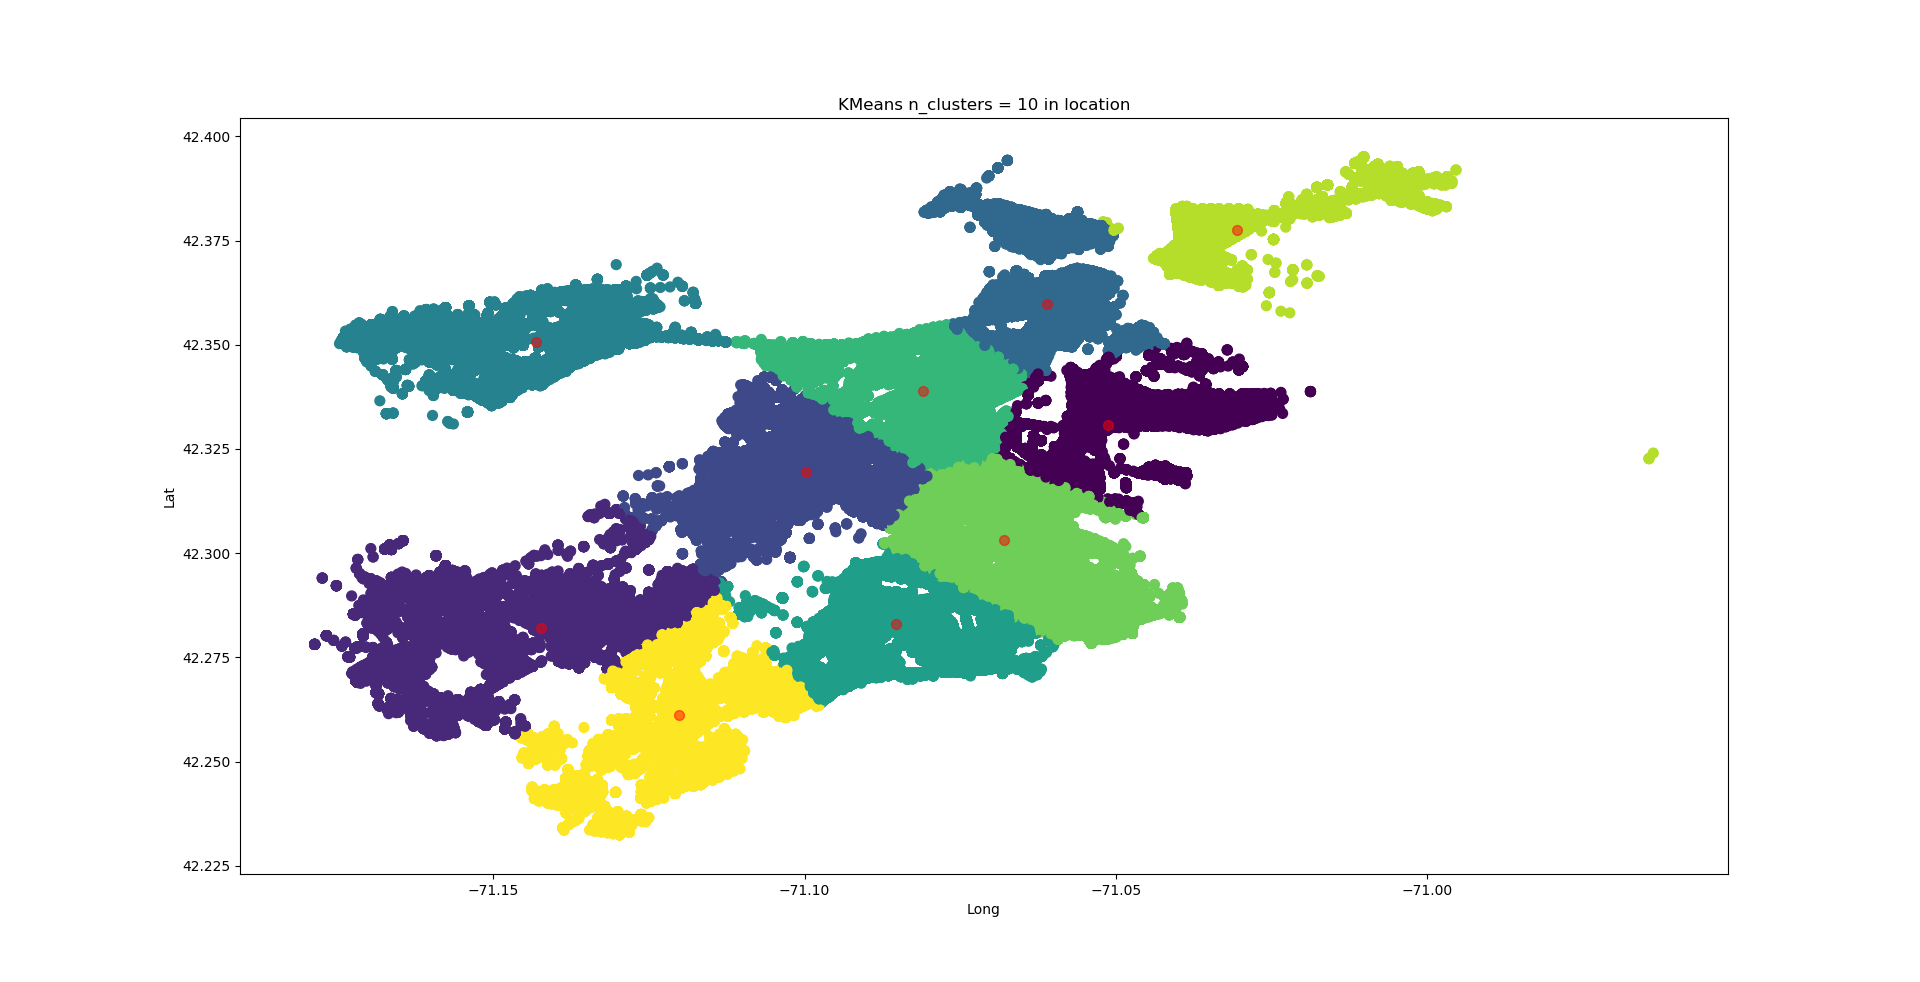

In [21]:
Image("./Q5_Plots/location-10clusters.png")

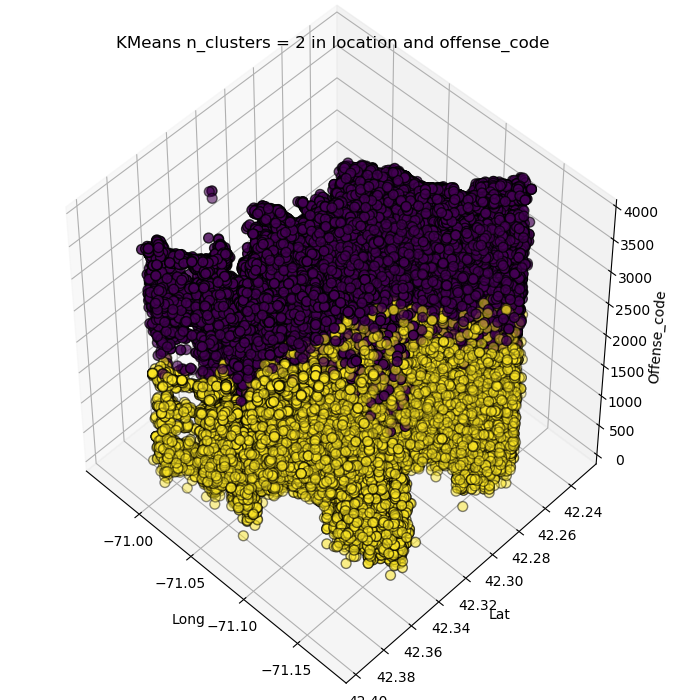

In [22]:
Image("./Q5_Plots/location-offence-code-2clusters.png")

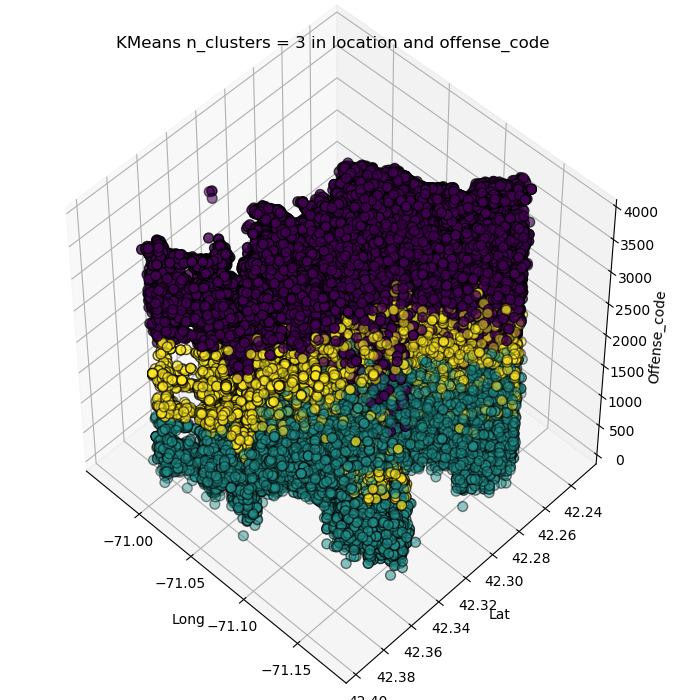

In [23]:
Image("./Q5_Plots/location-offence-code-3clusters.png")

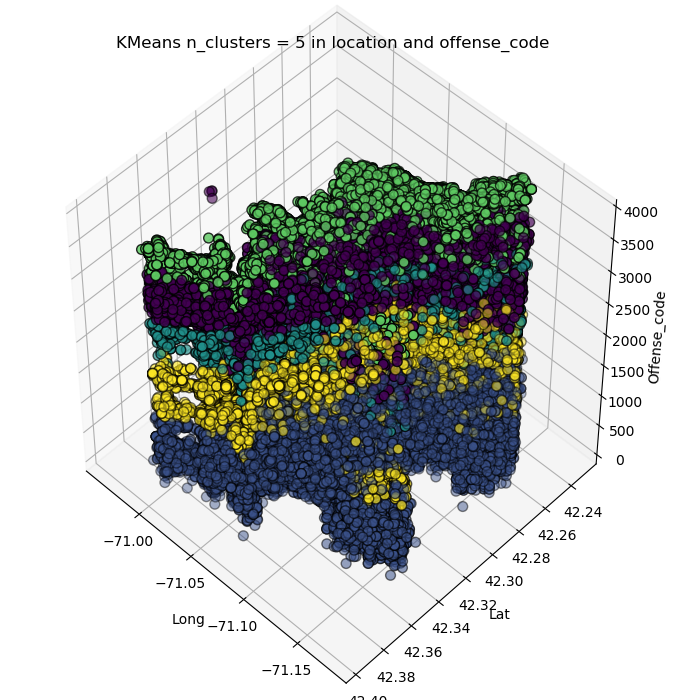

In [24]:
Image("./Q5_Plots/location-offence-code-5clusters.png")

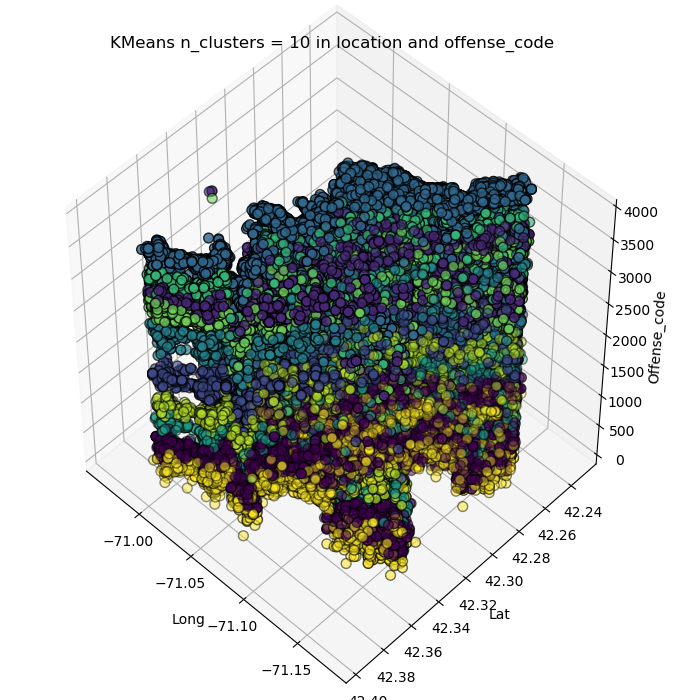

In [25]:
Image("./Q5_Plots/location-offence-code-10clusters.png")

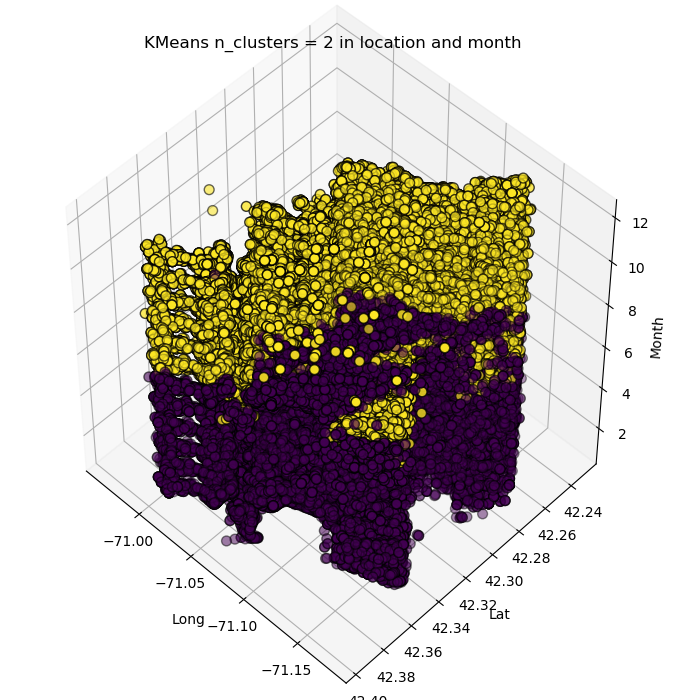

In [26]:
Image("./Q5_Plots/location-month-2clusters.png")

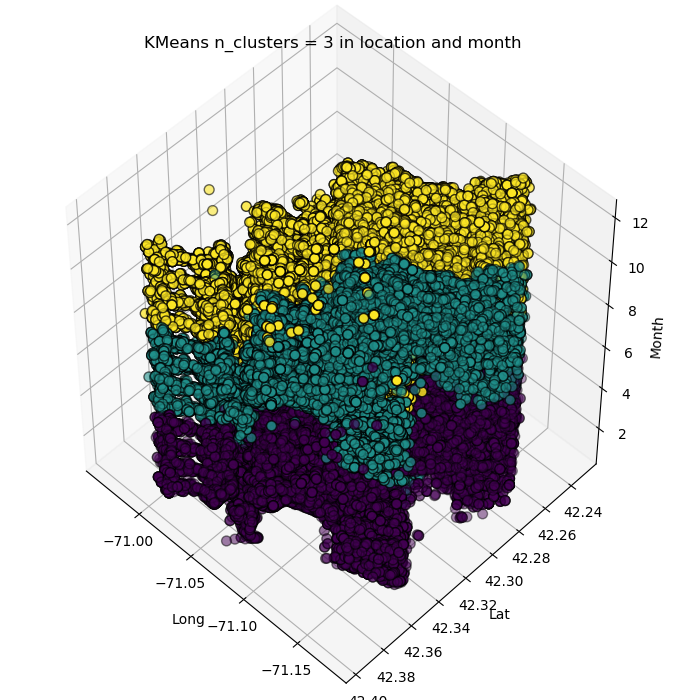

In [27]:
Image("./Q5_Plots/location-month-3clusters.png")

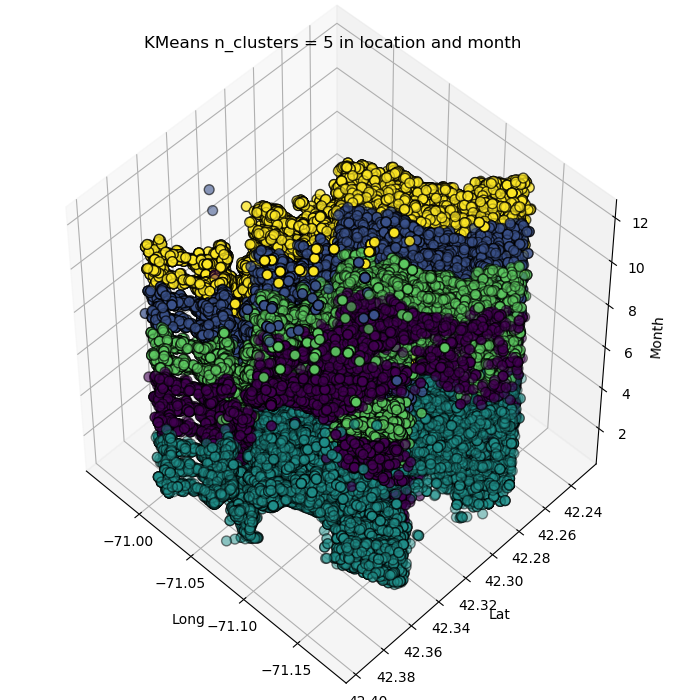

In [28]:
Image("./Q5_Plots/location-month-5clusters.png")

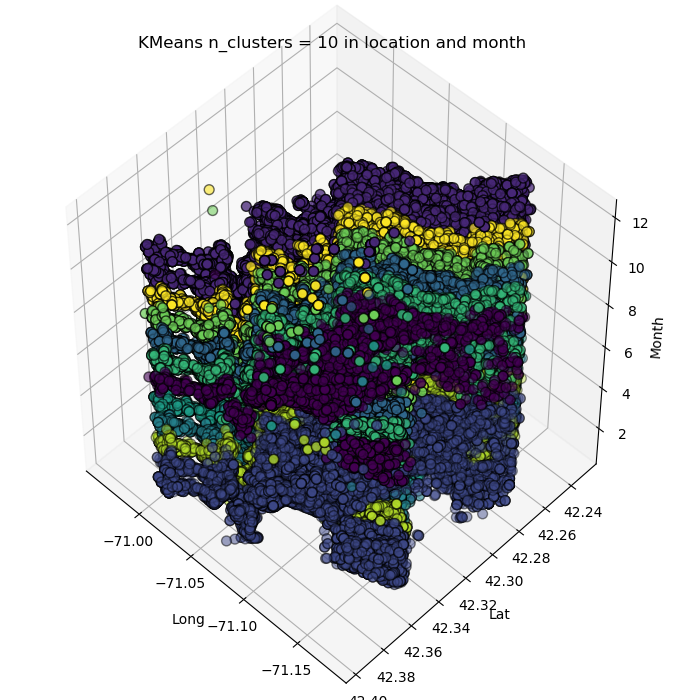

In [29]:
Image("./Q5_Plots/location-month-10clusters.png")

From this cell and below is the code for the bonus part of the exercise. Below we keep only 'Lat', 'Long', 'OFFENSE_CODE_GROUP' from dataframe's columns and we drop all NaN values.

In [30]:
location = dataframe[['Lat','Long','OFFENSE_CODE_GROUP']]
location = location.dropna()

We have chosen the following values from OFFENSE_CODE_GROUP column because they are the most common crimes as we can see in previous results of research. We also choose 'Drug Violation' because the exercise set this one as an example.

In [31]:
#Motor Vehicle Accident Response
location_MV_Accident_Response = location.loc[location['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response']
location_MV_Accident_Response = location_MV_Accident_Response[['Lat','Long']]
location_MV_Accident_Response = location_MV_Accident_Response.head(50)
lons_MV_Accident_Response = location_MV_Accident_Response["Long"].values
lats_MV_Accident_Response = location_MV_Accident_Response["Lat"].values

In [32]:
locations_MV_Accident_Response = list(zip(lats_MV_Accident_Response, lons_MV_Accident_Response))
popups_MV_Accident_Response = ['lon:{}<br>lat:{}'.format(lon, lat) for (lat, lon) in locations_MV_Accident_Response]

In [33]:
#Medical Assistance
location_medical_assistance = location.loc[location['OFFENSE_CODE_GROUP'] == 'Medical Assistance']
location_medical_assistance = location_medical_assistance[['Lat','Long']]
location_medical_assistance = location_medical_assistance.head(50)
lons_medical_assistance = location_medical_assistance["Long"].values
lats_medical_assistance = location_medical_assistance["Lat"].values

In [34]:
locations_medical_assistance = list(zip(lats_medical_assistance, lons_medical_assistance))
popups_medical_assistance = ['lon:{}<br>lat:{}'.format(lon, lat) for (lat, lon) in locations_medical_assistance]

In [35]:
#Larceny
location_larceny = location.loc[location['OFFENSE_CODE_GROUP'] == 'Larceny']
location_larceny = location_larceny[['Lat','Long']]
location_larceny = location_larceny.head(50)
lons_larceny = location_larceny["Long"].values
lats_larceny = location_larceny["Lat"].values

In [36]:
locations_larceny = list(zip(lats_larceny, lons_larceny))
popups_larceny = ['lon:{}<br>lat:{}'.format(lon, lat) for (lat, lon) in locations_larceny]

In [37]:
#Vandalism
location_vandalism = location.loc[location['OFFENSE_CODE_GROUP'] == 'Vandalism']
location_vandalism = location_vandalism[['Lat','Long']]
location_vandalism = location_vandalism.head(50)
lons_vandalism = location_vandalism["Long"].values
lats_vandalism = location_vandalism["Lat"].values

In [38]:
locations_vandalism = list(zip(lats_vandalism, lons_vandalism))
popups_vandalism = ['lon:{}<br>lat:{}'.format(lon, lat) for (lat, lon) in locations_vandalism]

In [39]:
#Drug Violation
location_drug_violation = location.loc[location['OFFENSE_CODE_GROUP'] == 'Drug Violation']
location_drug_violation = location_drug_violation[['Lat','Long']]
location_drug_violation = location_drug_violation.head(50)
lons_drug_violation = location_drug_violation["Long"].values
lats_drug_violation = location_drug_violation["Lat"].values

In [40]:
locations_drug_violation = list(zip(lats_drug_violation, lons_drug_violation))
popups_drug_violation = ['lon:{}<br>lat:{}'.format(lon, lat) for (lat, lon) in locations_drug_violation]

Now we have to create and add markers to our map for all the locations that we created for every OFFENSE_CODE_GROUP crime.

In [43]:
#to add folium write in a terminal: conda install -c conda-forge folium
from folium.plugins import MarkerCluster
import folium

m = folium.Map(location=[42.3601, -71.0589],zoom_start=12)

marker_cluster1 = MarkerCluster(
    locations=locations_drug_violation, popups=popups_drug_violation,
    name='Drug Violation',
    overlay=True,
    control=True,
    icon_create_function = None
)

marker_cluster2 = MarkerCluster(
    locations=locations_MV_Accident_Response, popups=popups_MV_Accident_Response,
    name='MV Accident Response',
    overlay=True,
    control=True,
    icon_create_function = None
)

marker_cluster3 = MarkerCluster(
    locations=locations_larceny, popups=popups_larceny,
    name='Larceny',
    overlay=True,
    control=True,
    icon_create_function = None
)

marker_cluster4 = MarkerCluster(
    locations=locations_vandalism, popups=popups_vandalism,
    name='Vandalism',
    overlay=True,
    control=True,
    icon_create_function = None
)

marker_cluster5 = MarkerCluster(
    locations=locations_medical_assistance, popups=popups_medical_assistance,
    name='Medical Assistance',
    overlay=True,
    control=True,
    icon_create_function = None
)

marker_cluster1.add_to(m)
marker_cluster2.add_to(m)
marker_cluster3.add_to(m)
marker_cluster4.add_to(m)
marker_cluster5.add_to(m)

folium.LayerControl().add_to(m)

m